In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import numpy as np

### Making data and saving to .npz file

In [8]:
#inputs 
n=1000
#generating inputs to the function 
x= np.random.uniform(low=-10, high=10, size=(n,1))
y= np.random.uniform(low=-10, high=10, size=(n,1))
#stacking the inputs 
inputs=np.column_stack((x,y))
noise=np.random.uniform(low=-1, high=1, size=(n,1))
#function

func=2*x+3*y+5+noise
#saving the file into NPZ
np.savez("TF_Intro", inputs=inputs, target=func)

### Loading data

In [9]:
training_data=np.load("TF_Intro.npz")

### Model without kernel and bias initializer

In [10]:
input_size=2
output_size=1

model=tf.keras.Sequential([tf.keras.layers.Dense(output_size)])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['target'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 34.8056
Epoch 2/100
1000/1000 - 0s - loss: 4.2705
Epoch 3/100
1000/1000 - 0s - loss: 1.4565
Epoch 4/100
1000/1000 - 0s - loss: 0.6649
Epoch 5/100
1000/1000 - 0s - loss: 0.4297
Epoch 6/100
1000/1000 - 0s - loss: 0.3803
Epoch 7/100
1000/1000 - 0s - loss: 0.3727
Epoch 8/100
1000/1000 - 0s - loss: 0.3520
Epoch 9/100
1000/1000 - 0s - loss: 0.3610
Epoch 10/100
1000/1000 - 0s - loss: 0.3587
Epoch 11/100
1000/1000 - 0s - loss: 0.3525
Epoch 12/100
1000/1000 - 0s - loss: 0.3588
Epoch 13/100
1000/1000 - 0s - loss: 0.3528
Epoch 14/100
1000/1000 - 0s - loss: 0.3544
Epoch 15/100
1000/1000 - 0s - loss: 0.3553
Epoch 16/100
1000/1000 - 0s - loss: 0.3560
Epoch 17/100
1000/1000 - 0s - loss: 0.3531
Epoch 18/100
1000/1000 - 0s - loss: 0.3507
Epoch 19/100
1000/1000 - 0s - loss: 0.3590
Epoch 20/100
1000/1000 - 0s - loss: 0.3563
Epoch 21/100
1000/1000 - 0s - loss: 0.3549
Epoch 22/100
1000/1000 - 0s - loss: 0.3546
Epoch 23/100
1000/1000 - 0s - loss: 0.35

In [12]:
#getting the weights and bias 
model.layers[0].get_weights()

[array([[1.9680582],
        [2.9414961]], dtype=float32),
 array([4.9902883], dtype=float32)]

In [15]:
#getting only weights
w=model.layers[0].get_weights()[0]
w

array([[1.9680582],
       [2.9414961]], dtype=float32)

In [17]:
#getting only bias
b=model.layers[0].get_weights()[1]
b

array([4.9902883], dtype=float32)

In [30]:
#predicting on the trained model
predict=np.round(model.predict_on_batch(training_data['inputs']),1)

In [32]:
#testing on the targets
tar=training_data['target'].round(1)

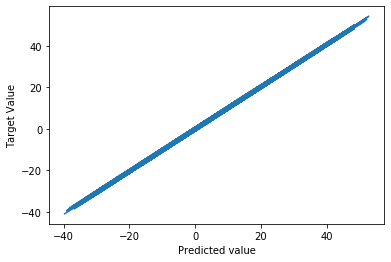

In [33]:
plt.plot(predict, tar)
plt.xlabel("Predicted value")
plt.ylabel("Target Value")
plt.show()

### Model with Kernel and Bias Initializer on same data set

In [36]:
input_size=2
output_size=1

model2=tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                           ])
cus_opt=tf.keras.optimizers.SGD(learning_rate=0.02)

model2.compile(optimizer=cus_opt, loss='mean_squared_error')
model2.fit(training_data['inputs'], training_data['target'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 30.8583
Epoch 2/100
1000/1000 - 0s - loss: 1.1690
Epoch 3/100
1000/1000 - 0s - loss: 0.5347
Epoch 4/100
1000/1000 - 0s - loss: 0.4064
Epoch 5/100
1000/1000 - 0s - loss: 0.4017
Epoch 6/100
1000/1000 - 0s - loss: 0.3872
Epoch 7/100
1000/1000 - 0s - loss: 0.4194
Epoch 8/100
1000/1000 - 0s - loss: 0.4184
Epoch 9/100
1000/1000 - 0s - loss: 0.4243
Epoch 10/100
1000/1000 - 0s - loss: 0.4069
Epoch 11/100
1000/1000 - 0s - loss: 0.4690
Epoch 12/100
1000/1000 - 0s - loss: 0.4078
Epoch 13/100
1000/1000 - 0s - loss: 0.3687
Epoch 14/100
1000/1000 - 0s - loss: 0.3895
Epoch 15/100
1000/1000 - 0s - loss: 0.4187
Epoch 16/100
1000/1000 - 0s - loss: 0.4085
Epoch 17/100
1000/1000 - 0s - loss: 0.4177
Epoch 18/100
1000/1000 - 0s - loss: 0.3777
Epoch 19/100
1000/1000 - 0s - loss: 0.4014
Epoch 20/100
1000/1000 - 0s - loss: 0.4008
Epoch 21/100
1000/1000 - 0s - loss: 0.4070
Epoch 22/100
1000/1000 - 0s - loss: 0.4078
Epoch 23/100
1000/1000 - 0s - loss: 0.38

In [40]:
model2.layers[0].get_weights()

[array([[1.9831275],
        [3.0040262]], dtype=float32),
 array([4.988267], dtype=float32)]

In [41]:
#getting only weights of model 2
w1=model2.layers[0].get_weights()[0]
w1

array([[1.9831275],
       [3.0040262]], dtype=float32)

In [42]:
b1=model2.layers[0].get_weights()[1]
b1

array([4.988267], dtype=float32)

In [46]:
predict2=np.round(model2.predict_on_batch(training_data['inputs']),1)
tar2=training_data['target'].round(1)

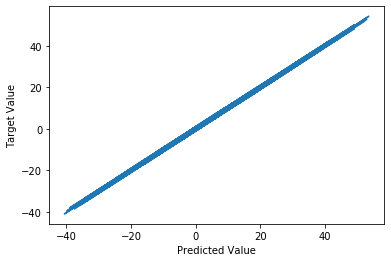

In [47]:
plt.plot(predict2,tar2)
plt.xlabel("Predicted Value")
plt.ylabel("Target Value")
plt.show()